In [6]:
import sklearn
print(sklearn.__version__)


1.5.2


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error, accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("heartv1.csv")
df.head()

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
0,male,65,0,130,254,0,0,147,0,1.4,1,1,3,10,11.44,0
1,male,53,0,140,261,0,0,186,1,0.0,2,0,2,-17,13.51,1
2,male,50,0,122,222,0,0,186,0,0.0,2,0,2,-14,9.46,1
3,female,47,1,112,160,0,1,138,0,0.0,1,0,2,37,8.34,1
4,male,47,0,142,309,0,0,147,1,0.0,1,3,3,28,13.43,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       1035 non-null   object 
 1   age                       1035 non-null   int64  
 2   cp                        1035 non-null   int64  
 3   resting_BP                1035 non-null   int64  
 4   chol                      1035 non-null   int64  
 5   fbs                       1035 non-null   int64  
 6   restecg                   1035 non-null   int64  
 7   thalach                   1035 non-null   int64  
 8   exang                     1035 non-null   int64  
 9   oldpeak                   1035 non-null   float64
 10  slope                     1035 non-null   int64  
 11  ca                        1035 non-null   int64  
 12  thal                      1035 non-null   int64  
 13  Max Heart Rate Reserve    1035 non-null   int64  
 14  Heart Di

In [12]:
df.describe()

,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,56.447343,0.944928,131.663768,245.608696,0.150725,0.531401,149.182609,0.338164,1.078937,1.381643,0.760386,2.321739,16.339130,11.873952,0.513043
std,9.098955,1.029479,17.503716,51.532478,0.357953,0.527511,22.952151,0.473313,1.174529,0.620609,1.033564,0.621862,21.140178,2.235081,0.500071
min,28.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,7.540000,0.000000
25%,50.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,10.160000,0.000000
50%,58.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,12.000000,11.690000,1.000000
75%,63.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,28.000000,13.560000,1.000000
max,79.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,82.000000,18.800000,1.000000


In [13]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])

x = df.drop(columns=['target'])
y = df['target']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Logistic Regression
Accuracy: 0.8647342995169082
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.82        83
           1       0.87      0.91      0.89       124

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.86       207
weighted avg       0.86      0.86      0.86       207



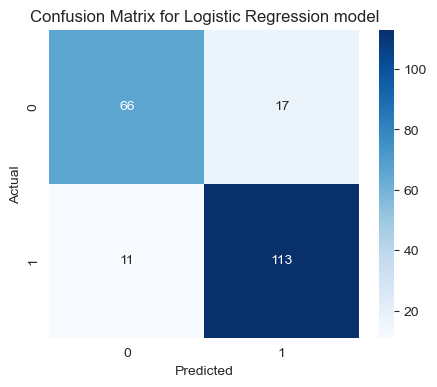

----------------------------------------------------------------------------------------------------
Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



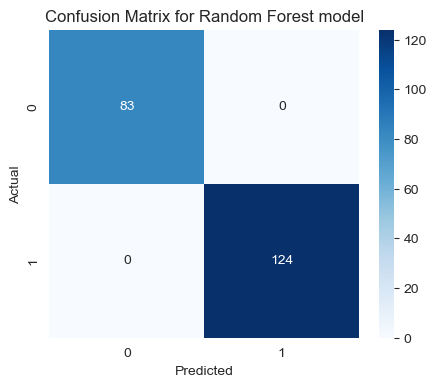

----------------------------------------------------------------------------------------------------
Gradient Boosting
Accuracy: 0.9855072463768116
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        83
           1       1.00      0.98      0.99       124

    accuracy                           0.99       207
   macro avg       0.98      0.99      0.99       207
weighted avg       0.99      0.99      0.99       207



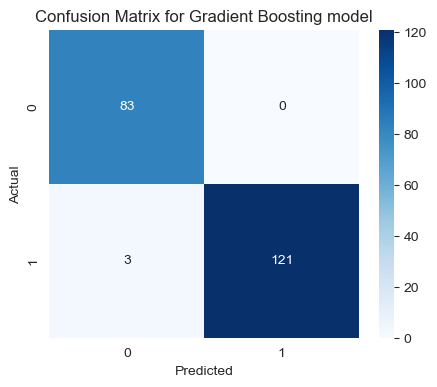

----------------------------------------------------------------------------------------------------
Ada Boost
Accuracy: 0.927536231884058
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        83
           1       0.94      0.94      0.94       124

    accuracy                           0.93       207
   macro avg       0.92      0.93      0.92       207
weighted avg       0.93      0.93      0.93       207



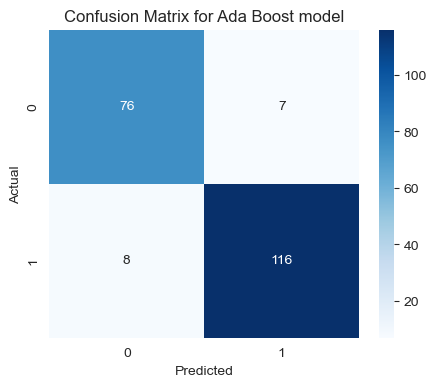

----------------------------------------------------------------------------------------------------
Extra Trees
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



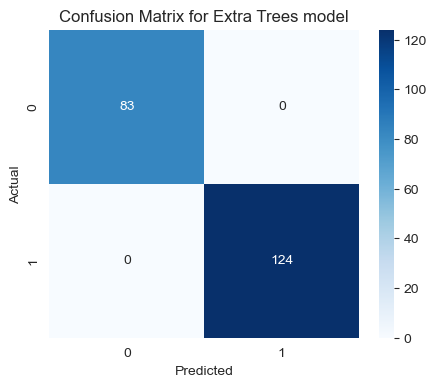

----------------------------------------------------------------------------------------------------
Bagging
Accuracy: 0.9710144927536232
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        83
           1       1.00      0.95      0.98       124

    accuracy                           0.97       207
   macro avg       0.97      0.98      0.97       207
weighted avg       0.97      0.97      0.97       207



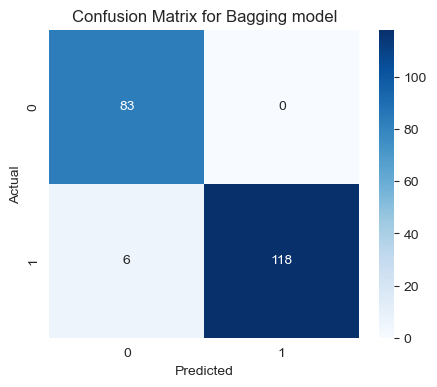

----------------------------------------------------------------------------------------------------
SVM
Accuracy: 0.9178743961352657
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90        83
           1       0.93      0.93      0.93       124

    accuracy                           0.92       207
   macro avg       0.91      0.92      0.91       207
weighted avg       0.92      0.92      0.92       207



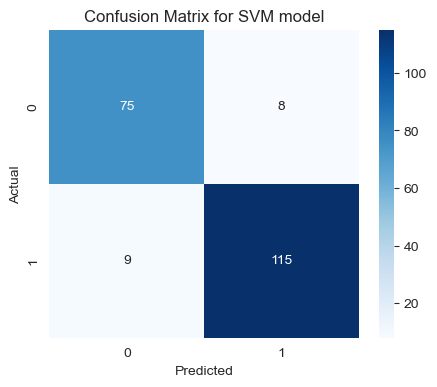

----------------------------------------------------------------------------------------------------
XGBoost
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



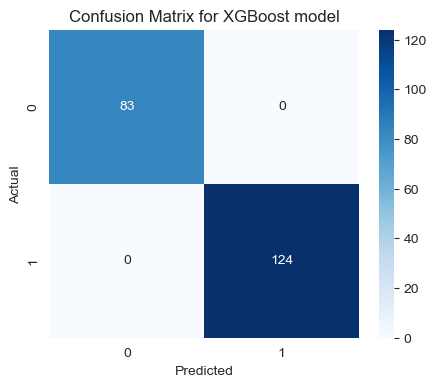

----------------------------------------------------------------------------------------------------
LightGBM
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



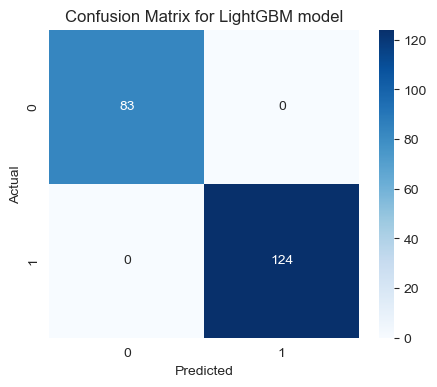

----------------------------------------------------------------------------------------------------
CatBoost
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



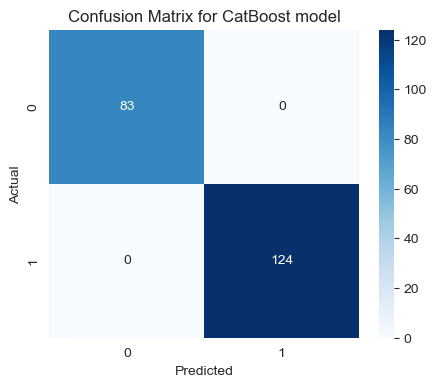

----------------------------------------------------------------------------------------------------


In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name} model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-"*100)

In [22]:
# Dump all models

from joblib import dump

for name, model in models.items():
  dump(model, f'{name}.joblib')